In [66]:
# libraries
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# read data file
df = pd.read_csv('./data/churn.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [4]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [5]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
df.Geography.unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [7]:
df = df[['CreditScore', 'Geography','Gender', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited']]
df.head()

,CreditScore,Geography,Gender,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,2,125510.82,1,1,1,79084.10,0


In [8]:
geo_df = pd.get_dummies(df['Geography'])
gender_df = pd.get_dummies(df['Gender'])
print(geo_df.head())
print(gender_df.head())

   France  Germany  Spain
0       1        0      0
1       0        0      1
2       1        0      0
3       1        0      0
4       0        0      1
   Female  Male
0       1     0
1       1     0
2       1     0
3       1     0
4       1     0


In [9]:
df = pd.concat([df, geo_df, gender_df], axis=1)
df = df.drop(['Geography', 'Gender'], axis=1)
df.head()

,CreditScore,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,France,Germany,Spain,Female,Male
0,619,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,608,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,502,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,699,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,850,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0


In [10]:
y = df['Exited']
X = df.copy()
X = X.drop(['Exited'], axis=1)

In [53]:
# Separating traing & test sets
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X,y,test_size=0.33,random_state=1) 

print(xtrain.shape, xtest.shape, ytrain.shape, ytest.shape)

(6700, 12) (3300, 12) (6700,) (3300,)


## Linear Regression

In [13]:
# simple linear regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [14]:
model_LR = LogisticRegression()
model_LR.fit(xtrain, ytrain)
pred_LR = model_LR.predict(xtest)

In [15]:
print(classification_report(ytest, pred_LR))

              precision    recall  f1-score   support

           0       0.79      1.00      0.88      2609
           1       0.00      0.00      0.00       691

    accuracy                           0.79      3300
   macro avg       0.40      0.50      0.44      3300
weighted avg       0.63      0.79      0.70      3300



C:\Users\gmlkd\miniforge3\envs\fastcampus\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\gmlkd\miniforge3\envs\fastcampus\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\gmlkd\miniforge3\envs\fastcampus\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



## KNN Classifier

In [17]:
# simple KNN classification
from sklearn.neighbors import KNeighborsClassifier


## Classification Tree

In [19]:
# DecisionTree
from sklearn.tree import DecisionTreeClassifier

model_DT = DecisionTreeClassifier(max_depth=1)
model_DT.fit(xtrain, ytrain)

DecisionTreeClassifier(max_depth=1)

In [20]:
pred_DT = model_DT.predict(xtest)

In [21]:
print(classification_report(ytest, pred_DT))

              precision    recall  f1-score   support

           0       0.81      1.00      0.90      2609
           1       0.91      0.13      0.23       691

    accuracy                           0.82      3300
   macro avg       0.86      0.57      0.57      3300
weighted avg       0.83      0.82      0.76      3300



In [22]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y, model_DT.predict(X))

array([[7917,   46],
       [1757,  280]], dtype=int64)

In [23]:
#RandomForest
from sklearn.ensemble import RandomForestClassifier

model_RF = RandomForestClassifier()
model_RF.fit(xtrain, ytrain)
pred_RF = model_RF.predict(xtest)

In [24]:
print(accuracy_score(ytest, pred_RF))

0.8154545454545454


In [25]:
print(classification_report(ytest, pred_RF))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      2609
           1       0.63      0.29      0.40       691

    accuracy                           0.82      3300
   macro avg       0.73      0.62      0.64      3300
weighted avg       0.79      0.82      0.79      3300



In [26]:
model_RF.feature_importances_

array([0.21131898, 0.11385603, 0.2013356 , 0.14563982, 0.02025946,
       0.02883837, 0.21965756, 0.01019849, 0.02175462, 0.00896197,
       0.00920151, 0.0089776 ])

In [27]:
df.columns

Index(['CreditScore', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'France', 'Germany',
       'Spain', 'Female', 'Male'],
      dtype='object')

## SVM

In [28]:
# SVM
from sklearn.svm import SVC
from sklearn import svm

In [34]:
model = svm.SVC(kernel='rbf', gamma='auto').fit(xtrain, ytrain)
pred_svm = model.predict(xtest)
print(classification_report(ytest, pred_svm))

              precision    recall  f1-score   support

           0       0.79      1.00      0.88      2609
           1       0.00      0.00      0.00       691

    accuracy                           0.79      3300
   macro avg       0.40      0.50      0.44      3300
weighted avg       0.63      0.79      0.70      3300



C:\Users\gmlkd\miniforge3\envs\fastcampus\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\gmlkd\miniforge3\envs\fastcampus\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\gmlkd\miniforge3\envs\fastcampus\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


- 유일하게 DT와 RF만 1일때의 f1-score가 나온다
- scaling과 correlation확인 이후 다시 학습해보기

In [38]:
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

## Scaling

In [54]:
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
X_scaled = pd.DataFrame(data=X_scaled, index=X.index, columns=X.columns)
X_scaled.head()

,CreditScore,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,France,Germany,Spain,Female,Male
0,-0.326221,-1.041760,-1.225848,-0.911583,0.646092,0.970243,0.021886,0.997204,-0.578736,-0.573809,1.095988,-1.095988
1,-0.440036,-1.387538,0.117350,-0.911583,-1.547768,0.970243,0.216534,-1.002804,-0.578736,1.742740,1.095988,-1.095988
2,-1.536794,1.032908,1.333053,2.527057,0.646092,-1.030670,0.240687,0.997204,-0.578736,-0.573809,1.095988,-1.095988
3,0.501521,-1.387538,-1.225848,0.807737,-1.547768,-1.030670,-0.108918,0.997204,-0.578736,-0.573809,1.095988,-1.095988
4,2.063884,-1.041760,0.785728,-0.911583,0.646092,0.970243,-0.365276,-1.002804,-0.578736,1.742740,1.095988,-1.095988


In [55]:
xtrain, xtest, ytrain, ytest = train_test_split(X_scaled,y,test_size=0.33,random_state=1) 

print(xtrain.shape, xtest.shape, ytrain.shape, ytest.shape)

(6700, 12) (3300, 12) (6700,) (3300,)


### DecisionTree

In [56]:
model_DT = DecisionTreeClassifier(max_depth=1)
model_DT.fit(xtrain, ytrain)
pred_DT = model_DT.predict(xtest)
print(classification_report(ytest, pred_DT))

              precision    recall  f1-score   support

           0       0.81      1.00      0.90      2609
           1       0.91      0.13      0.23       691

    accuracy                           0.82      3300
   macro avg       0.86      0.57      0.57      3300
weighted avg       0.83      0.82      0.76      3300



### RandomForest

In [57]:
model_RF = RandomForestClassifier()
model_RF.fit(xtrain, ytrain)
pred_Rf = model_RF.predict(xtest)
print(classification_report(ytest, pred_RF))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      2609
           1       0.63      0.29      0.40       691

    accuracy                           0.82      3300
   macro avg       0.73      0.62      0.64      3300
weighted avg       0.79      0.82      0.79      3300



### SVM

In [58]:
model = svm.SVC(kernel='rbf', gamma='auto').fit(xtrain, ytrain)
pred_svm = model.predict(xtest)
print(classification_report(ytest, pred_svm))

              precision    recall  f1-score   support

           0       0.82      0.98      0.89      2609
           1       0.72      0.20      0.32       691

    accuracy                           0.82      3300
   macro avg       0.77      0.59      0.61      3300
weighted avg       0.80      0.82      0.77      3300



### LogisticRegression

In [59]:
model_LR = LogisticRegression()
model_LR.fit(xtrain, ytrain)
pred_LR = model_LR.predict(xtest)
print(classification_report(ytest, pred_LR))

              precision    recall  f1-score   support

           0       0.79      0.99      0.88      2609
           1       0.50      0.03      0.06       691

    accuracy                           0.79      3300
   macro avg       0.65      0.51      0.47      3300
weighted avg       0.73      0.79      0.71      3300



- scaling후 SVM의 성능이 많이 올라왔다. 하지만 그래도 f-1 score, recall등은 RandomForest가 더 좋게 나온다

## VIF

In [63]:
X.head()

,CreditScore,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,France,Germany,Spain,Female,Male
0,619,2,0.00,1,1,1,101348.88,1,0,0,1,0
1,608,1,83807.86,1,0,1,112542.58,0,0,1,1,0
2,502,8,159660.80,3,1,0,113931.57,1,0,0,1,0
3,699,1,0.00,2,0,0,93826.63,1,0,0,1,0
4,850,2,125510.82,1,1,1,79084.10,0,0,1,1,0


In [69]:
df.head()

,CreditScore,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,France,Germany,Spain,Female,Male
0,619,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,608,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,502,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,699,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,850,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0


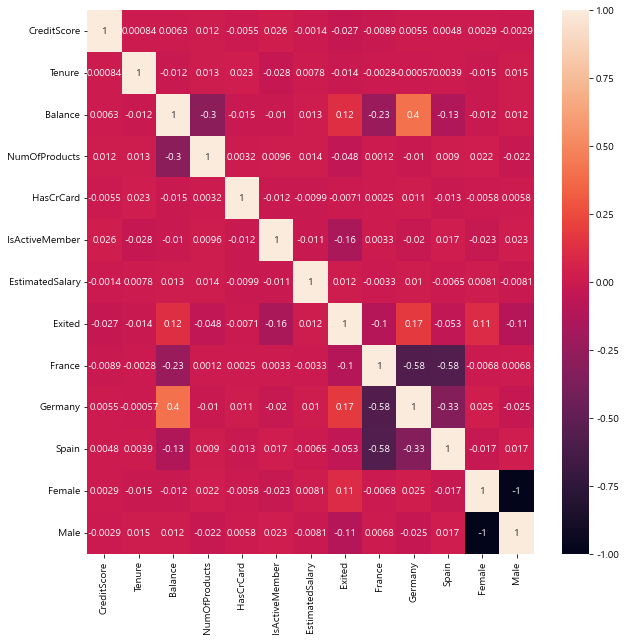

In [70]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [71]:
pd.DataFrame({
    "VIF": [variance_inflation_factor(X.values, idx) for idx in range(X.shape[1])],
    "features": X.columns,
})

C:\Users\gmlkd\miniforge3\envs\fastcampus\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,VIF,features
0,1.001005,CreditScore
1,1.001894,Tenure
2,1.336460,Balance
3,1.121407,NumOfProducts
4,1.001464,HasCrCard
5,1.002849,IsActiveMember
6,1.000893,EstimatedSalary
7,inf,France
8,inf,Germany
9,inf,Spain
